In [52]:
#meta: 1/19/2020 Linear regression - Naive Implementation of Gradient Descent 
# Univariate linear regression manually to see how Gradient Descent algorithm works.  
# src for markup https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb


#step by step

#here: 1/19/2020 
#      Tiny dataset - 3 points, no intercept
#      EDA plot training data
#      Model Representation: slope only
#      Fit parameters theta to X,y data (manually)
#      Result: linear model with one variable
#      Plot linear regression
#      Visualize Cost function J (2D)

#      Tiny dataset - 3 points, with intercept
#      EDA plot training data
#      Model Representation: intercept & slope
#      Fit parameters theta to X,y data (manually and automatically)
#      Result: linear model with two variables
#      Plot linear regression
#      Visualize Cost function J (3D Surface plot)

#      Xtra: confirm with functions
#      Tiny dataset - 3 points, with intercept
#      EDA plot training data
#      Model Representation:
#      -Define Cost function J
#      -Define Gradient Descent function
#      Fit parameters theta to X,y data (with functions)
#      Result: linear model with two variables
#      Plot linear regression
#      Visualize Cost function J (3D Surface and 2D Contour plots)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d #to plot in 3D
from scipy.interpolate import make_interp_spline, BSpline #to smooth the line between points


# 2. Linear Regression - Naive Implementation of Gradient Descent
Implement linear regression manually to understand how Gradient Descent algorithm works.  

-  Start with a tiny dataset, one variable  

Tiny Dataset: 3 rows, 2 columns   
*x* - input  
*y* - output


## 2.1 Univariate, One Parameter - Slope and No Intercept



### 2.1.0. Create Data
package: numpy

In [3]:
data = np.array([[1,1],[2,2],[3,3]])
print(data.shape)
#preview data
print("Preview data")
print(data)


(3, 2)
Preview data
[[1 1]
 [2 2]
 [3 3]]


### 2.1.1. Visualize Data
Package: matplotlib  
EDA.  Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

In [4]:
#designate input x and output y
x=data[:,0] 
y=data[:,1]
print( "Input x: ", x)
print( "Output y: ", y)

#m - number of training examples
m=y.size
print ("Number of data points: {}".format(m))


Input x:  [1 2 3]
Output y:  [1 2 3]
Number of data points: 3


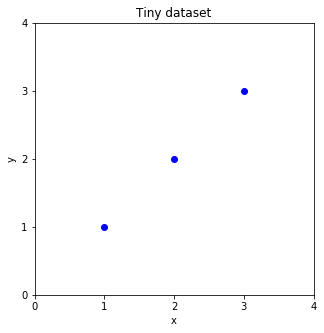

In [5]:
#plot
plt.figure(figsize=(5,5))
plt.title('Tiny dataset')
plt.scatter(x,y, marker = 'o', c='b')
plt.xlabel('x')
plt.ylabel ('y')
plt.xticks(np.arange(x.max()+2))
plt.yticks(np.arange(y.max()+2))
plt.show()

In visual terms, our training data set is scattered on the x-y plane. We are trying to make a straight line (defined by hθ(x)) which passes through these scattered data points.  In this example, it's easy to visually determine no intercept and the slope coeffecient = 1.  

We want to step through some coefficients to find the best possible line mathematically.

### 2.1.2.  Probabilistic Representation - Univariate, One Parameter
aka no intercept

###  Model
aka hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta x$$

### Parameters
$\theta$

### Cost Function J
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( \theta x^{(i)} - y^{(i)}\right)^2$$

### Objective Function
The objective of linear regression is to minimize the cost function
$$ \min_{\theta} J (\theta) $$

In [6]:
#try a few thetas
thetas = [0,0.5,1, 1.5, 2]
print("Try a handful of parameter values: ", thetas)

Try a handful of parameter values:  [0, 0.5, 1, 1.5, 2]


In [7]:
#compute cost J manually
Js = []

for theta in thetas: 
    print ('\nif theta = ', theta)
    #compute cost funciton J manually first
    y_hat = np.dot(theta, x)
    error = y_hat - y
    error_sqrd = error**2
    J= error_sqrd.sum()/(2*m)
    Js.append(J)
    
    print ("y_hat: ", y_hat)
    print ("error_loss: ", error)
    #print ("error_loss squared: ", error_sqrd)
    #print ("error_loss squared sum: ", error_sqrd.sum())
    print ("cost J: ", J)
    
print ("\nAll J: ", Js)




if theta =  0
y_hat:  [0 0 0]
error_loss:  [-1 -2 -3]
cost J:  2.3333333333333335

if theta =  0.5
y_hat:  [0.5 1.  1.5]
error_loss:  [-0.5 -1.  -1.5]
cost J:  0.5833333333333334

if theta =  1
y_hat:  [1 2 3]
error_loss:  [0 0 0]
cost J:  0.0

if theta =  1.5
y_hat:  [1.5 3.  4.5]
error_loss:  [0.5 1.  1.5]
cost J:  0.5833333333333334

if theta =  2
y_hat:  [2 4 6]
error_loss:  [1 2 3]
cost J:  2.3333333333333335

All J:  [2.3333333333333335, 0.5833333333333334, 0.0, 0.5833333333333334, 2.3333333333333335]


### 2.1.3 Communicate Results
Plot the linear fit  
Hypothesis $h_\theta(x)$ is given by the linear model

In [8]:
print("Linear model after finding thetas: ")
print ("y_hat = {:.2f} * x_1".format( thetas[Js.index(min(Js))]))

Linear model after finding thetas: 
y_hat = 1.00 * x_1


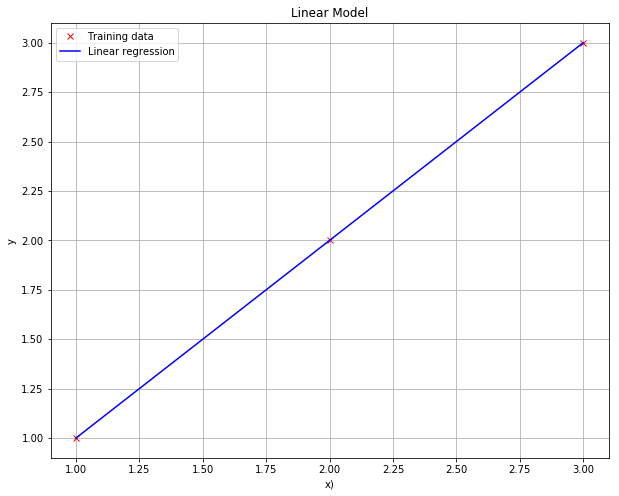

In [9]:
#visualize
plt.figure(figsize=(10,8))
plt.title('Linear Model')

plt.plot(x,y, 'rx', label = 'Training data')
plt.plot(x,np.dot(x, thetas[Js.index(min(Js))]), 'b-', label = 'Linear regression')

plt.xlabel('x)')
plt.ylabel ('y')
plt.grid(True)
plt.legend()
plt.show()

### 2.1.4 Plot Cost Function $ J (\theta) $
package: scipy.BSpline to smooth the line

Plotting J points yields to the following graph:


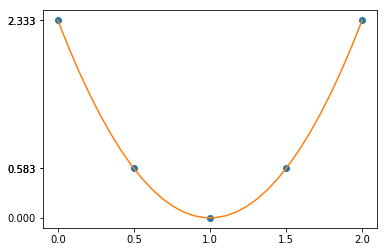

In [10]:
#plot cost J function with param theta 
#plt.plot(thetas, Js, 'o')

#plot smooth cost J function with param theta 
thetas_smooth = np.linspace(np.array(thetas).min(), np.array(thetas).max(), 30)
spl = make_interp_spline(np.array(thetas), np.array(Js), k=3)  # type: BSpline
Js_smooth = spl(thetas_smooth)

#plot
plt.plot(thetas, Js, 'o')
plt.plot(thetas_smooth, Js_smooth, '-')
plt.xticks(thetas)
plt.yticks(Js)
plt.show()

This example shows the ideal situation where cost function J = 0 when $\theta$ (slope) = 1 .

## 2.2 Univariate, Two Parameters - Intercept and Slope


### 2.2.0. Create Data


In [11]:
data = np.array([[1,2],[2,3],[3,4]])
print(data.shape)
#preview data
print("Preview data")
print(data)


(3, 2)
Preview data
[[1 2]
 [2 3]
 [3 4]]


### 2.2.1. Visualize Data
EDA.  Use a scatter plot to visualize the data.

In [12]:
#designate input x and output y
x=data[:,0] 
y=data[:,1]
print( "Input x: ", x)
print( "Output y: ", y)

#m - number of training examples
m=y.size
print ("Number of data points: {}".format(m))

Input x:  [1 2 3]
Output y:  [2 3 4]
Number of data points: 3


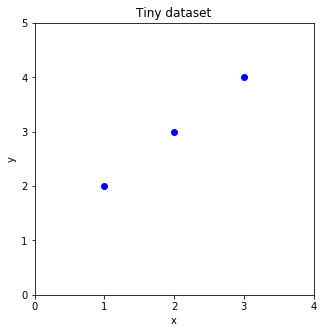

In [13]:
#plot
plt.figure(figsize=(5,5))
plt.title('Tiny dataset')
plt.scatter(x,y, marker = 'o', c='b')
plt.xlabel('x')
plt.ylabel ('y')
plt.xticks(np.arange(x.max()+2))
plt.yticks(np.arange(y.max()+2))
plt.show()

### 2.2.2.  Probabilistic Representation

###  Model
aka hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x_1$$

### Parameters
$\theta_0$ , $\theta_1$

### Cost Function J
$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)}\right)^2$$

### Objective Function
The objective of linear regression is to minimize the cost function
$$ \min_{\theta_0, \theta_1} J (\theta_0, \theta_1) $$

### 2.2.2a Naive Implementation
Manual, not vectotized - to step through GD update functions

### - Data Prep
We add another dimension to our data to accommodate the  $\theta_0$  intercept term.
<div class="alert alert-block alert-info">
**Implementation Note:**<br>
We store each example as a row in the the $X$ matrix in Python `numpy`.<br>
To take into account the intercept term $\theta_0$, we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [14]:
# Add a column of ones to X
print("X features: X_0 = 1 (bias var), X_1 = input")
X = np.array([np.ones(m), x])
print('X shape: ', X.shape)
#view data
print(X)


X features: X_0 = 1 (bias var), X_1 = input
X shape:  (2, 3)
[[1. 1. 1.]
 [1. 2. 3.]]


### - Data Transformed Summary
We have set up the data for linear regression.  

<div class="alert alert-success">
myNote:<br>
*X* (matrix)  - input features<br>
*y* (vector)  - output variable<br>
$\theta$ (vector) - parameters<br>
<br>
dim:<br>
*n* - rows, here # of features<br>
*m* - columns, here # of training examples
</div>


In [15]:
# m x n -> n features, m training records
n = X.shape[0]
print('\n# of features: ', n)
print('# of records: ', m)

# y already defined
print('y shape: ', y.shape)


# of features:  2
# of records:  3
y shape:  (3,)


Remember that the variables X and y are not scalar values. 
- X is a matrix whose rows represent the examples from the training set 
- y is a vector whose each elemennt represent the value at a given row of X.

<div class="alert alert-success">
myNote:<br>
X          matrix  (2,3)<br>
theta      vector  (2,1)<br>
<br>
Matrix multiplication:<br>
y_hat = theta.T $*$ X => (1,2) x (2,3) = (1,3)
</div>

### - Start Finding $\theta$ with Gradient Descent Manually

In [16]:
#initialize gradient descent settings
alpha = 0.1

#### Step 0. Track for plotting

In [17]:
theta_vals = []
J_vals = []

#### Step 1. Initialize the initial parameters $ \theta $ to 0

In [18]:
#initialize fitting parameters
#np.array([[0],[0]])
theta = np.zeros((n, 1))

print('θ shape: ', theta.shape)
print('θ: \n',theta)


θ shape:  (2, 1)
θ: 
 [[0.]
 [0.]]


In [19]:
#compute cost funciton J manually first
y_hat = np.dot(theta.T, X)
error = y_hat - y
error_sqrd = error**2
J= error_sqrd.sum()/(2*m)

print ("y_hat: ", y_hat)
print ("error_loss: ", error)
#print ("error_loss squared: ", error_sqrd)
#print ("error_loss squared sum: ", error_sqrd.sum())
print ("cost J: ", J)


y_hat:  [[0. 0. 0.]]
error_loss:  [[-2. -3. -4.]]
cost J:  4.833333333333333


In [20]:
#track
theta_vals.append(theta[:,[0]].T.flatten()) #a list of arrays
J_vals.append(J)

#### Step 2. Simultenaneously update $ \theta $ 

In [21]:
#compute gradients
theta0 = theta[0]
gradient0 = error.sum() / m #no need for *X[0]
print("gradient0", gradient0)

theta1 = theta[1]
gradient1 = (error * X[1]).sum() / m
print("gradient1", gradient1)

#update thetas
theta[0] = theta0 - alpha * gradient0
theta[1] = theta1 - alpha * gradient1

print("Updated θ: \n ", theta0, theta1)


gradient0 -3.0
gradient1 -6.666666666666667
Updated θ: 
  [0.3] [0.66666667]


Repeat...

In [22]:
#compute cost funciton J manually first
y_hat = np.dot(theta.T, X)
error = y_hat - y
error_sqrd = error**2
J= error_sqrd.sum()/(2*m)

print ("y_hat: ", y_hat)
print ("error_loss: ", error)
print ("error_loss squared: ", error_sqrd)
print ("error_loss squared sum: ", error_sqrd.sum())
print ("cost J: ", J)


y_hat:  [[0.96666667 1.63333333 2.3       ]]
error_loss:  [[-1.03333333 -1.36666667 -1.7       ]]
error_loss squared:  [[1.06777778 1.86777778 2.89      ]]
error_loss squared sum:  5.825555555555554
cost J:  0.9709259259259256


In [23]:
#track
theta_vals.append(theta[:,[0]].T.flatten()) #a list of arrays
J_vals.append(J)

In [24]:
#preview tracking 
print(theta_vals[0].shape) 
print(theta_vals) 
print("2nd column: ", np.array(theta_vals)[:,1])

(2,)
[array([0., 0.]), array([0.3       , 0.66666667])]
2nd column:  [0.         0.66666667]


### - Automate Finding $\theta$ with Gradient Descent
Instead of manually updating again, naively loop through for general understanding and replace with vectorized (non-looping) after get the idea.

In [25]:
#loop until converge
#initialize fitting parameters
theta = np.zeros((n, 1))
print("Initial thetas: {}\n".format(theta.T))

theta_vals = []
J_vals = []

#track initial theta
theta_vals.append(theta[:,[0]].T.flatten())

#declare vars for looping
i=0
J = np.inf
isConverged = False
epsilon=0.0001

while not isConverged:
    y_hat = np.dot(theta.T, X)
    error = y_hat - y
    error_sqrd = error**2
    J = error_sqrd.sum()/(2*m)

    
    #for these thetas, compute gradients, calculate GD update functions, simultaneous update
    gradient0 = error.sum() / m
    #print("gradient0", gradient0)

    gradient1 = (error * X[1]).sum() / m
    #print("gradient1", gradient1)
    
    #temp thetas
    theta0_temp = theta[0] - alpha * gradient0 
    theta1_temp = theta[1] - alpha * gradient1

    #check for convergence
    if (abs(theta[0]-theta0_temp) <= epsilon and abs(theta[1]-theta1_temp)<= epsilon): 
        isConverged=True
        print ("\n----Converged in {} iterations".format(i+1))
        
    
    #update thetas
    theta[0] = theta0_temp 
    theta[1] = theta1_temp 
    
    #view progression
    if i<5 or isConverged == True:
        print ("cost J: ", J)
        print ("y_hat: ", y_hat)
        print ("error_loss: ", error)
        #print ("error_loss squared: ", error_sqrd)
        #print ("error_loss squared sum: ", error_sqrd.sum())
        print("---iteration {}".format(i))
        print("thetas{}".format( theta.T))
        
    #track
    theta_vals.append(theta[:,[0]].T.flatten())
    J_vals.append(J)
    
    # update iter
    i+=1

#track J converged (aka rounded last value)
J_vals.append(round(J,4))

print ("\nLast J: ", round(J,4))
print ("Last Thetas: {}{}".format(theta0_temp, theta1_temp))


Initial thetas: [[0. 0.]]

cost J:  4.833333333333333
y_hat:  [[0. 0. 0.]]
error_loss:  [[-2. -3. -4.]]
---iteration 0
thetas[[0.3        0.66666667]]
cost J:  0.9709259259259256
y_hat:  [[0.96666667 1.63333333 2.3       ]]
error_loss:  [[-1.03333333 -1.36666667 -1.7       ]]
---iteration 1
thetas[[0.43666667 0.96222222]]
cost J:  0.20456522633744845
y_hat:  [[1.39888889 2.36111111 3.32333333]]
error_loss:  [[-0.60111111 -0.63888889 -0.67666667]]
---iteration 2
thetas[[0.50055556 1.09251852]]
cost J:  0.052279234339277565
y_hat:  [[1.59307407 2.68559259 3.77811111]]
error_loss:  [[-0.40692593 -0.31440741 -0.22188889]]
---iteration 3
thetas[[0.5319963 1.1492321]]
cost J:  0.021795228510643708
y_hat:  [[1.6812284  2.83046049 3.97969259]]
error_loss:  [[-0.3187716  -0.16953951 -0.02030741]]
---iteration 4
thetas[[0.54895025 1.17319119]]

----Converged in 335 iterations
cost J:  4.9026431761386e-06
y_hat:  [[1.99536943 2.99900628 4.00264314]]
error_loss:  [[-0.00463057 -0.00099372  0.00264

### 2.2.3 Communicate Results
Plot the linear fit  
Hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$


In [26]:
print("Linear model after finding thetas: ")
print ("y_hat = {:.2f} + {:.2f} * x_1".format( theta[0][0], theta[1][0]))

Linear model after finding thetas: 
y_hat = 0.99 + 1.00 * x_1


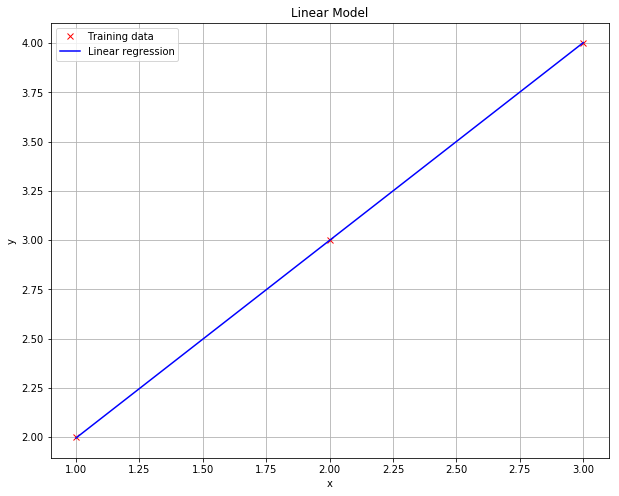

In [27]:
#visualize
plt.figure(figsize=(10,8))
plt.title('Linear Model')

plt.plot(X[1,:],y, 'rx', label = 'Training data')
plt.plot(X[1,:],np.dot(X.T, theta), 'b-', label = 'Linear regression')

plt.xlabel('x')
plt.ylabel ('y')
plt.grid(True)
plt.legend()
plt.show()

### 2.2.4 Plot Cost Function $ J (\theta) $

### 2.4 Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of θ0 and θ1 values.

Set up to calculate J(θ) over a grid of values using the computeCost function that you wrote.

In [28]:
#preview for plotting
print("thetas shape: ", np.array(theta_vals).shape)
print("First theta 0s: ", np.array(theta_vals[:3])[:,0])
print("First theta 1s: ", np.array(theta_vals[:3])[:,1])


thetas shape:  (336, 2)
First theta 0s:  [0.         0.3        0.43666667]
First theta 1s:  [0.         0.66666667 0.96222222]


Prepare plotting the surface

In [29]:
# Grid over which we will calculate J
x_vals = np.linspace(-2, 2, 100);
y_vals = np.linspace(-2, 2, 100);

xx, yy = np.meshgrid(x_vals, y_vals) #class numpy.ndarray size 100 x 100 = 10000

In [30]:
#duplicate for next plot
def computeCost(X,y,theta):
    """ function ComputeCost
    
    Objective
    =========
    Compute cost for linear regression 
    using theta as the parameter for linear regression 
    to fit the data points in X and y
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    
    Returns
    =========
    cost function J, type float

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """
    #initialize vars
    J=0
    m = y.size # number of training examples
    
    #compute hypothesis
    y_hat = np.dot( theta.T, X )
    #compute error
    error = y_hat - y
    error_sqrd = error**2
    #compute cost     
    J = error_sqrd.sum() / (2*m)
    
    return J

In [31]:
# initialize J_vals to a matrix of 0's
zz = np.zeros((len(x_vals), len(y_vals))) #class numpy.array

# Fill out J_vals
for i in np.arange(len(x_vals)):
    for j in np.arange(len(x_vals)):
        t = np.array([x_vals[i], y_vals[j]])
        #print (t.shape)
        zz[i,j] = computeCost(X, y, t) 


Prepare plotting only our Gradient Descent steps


In [32]:
# Grid over which we will calculate J
theta0_vals = np.array(theta_vals)[:,0]
theta1_vals = np.array(theta_vals)[:,1]
#J_vals already ready

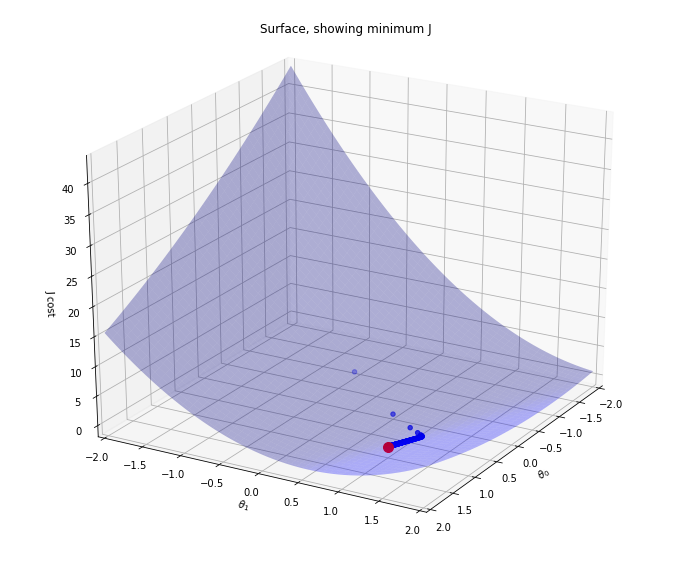

In [33]:
# plot 3D surface
plt.figure(figsize=(12,10))

#set axes
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('J cost')
#ax.set_xlim(-2,2); ax.set_ylim(-2,2); ax.set_zlim(0, 45)
ax.set_xlim(x_vals.min(),x_vals.max()); ax.set_ylim(y_vals.min(),y_vals.max()); ax.set_zlim(-1, zz.max())

#plot 3D Surface
ax.plot_surface(xx, yy, zz.T, color='b', alpha = 0.3) 

ax.view_init(25,30)
plt.title('Surface, showing minimum J\n')


# 3D optimal cost function J
ax.scatter3D(theta0_vals, theta1_vals, J_vals, c='b', marker = 'o', s=20)
ax.scatter3D(round(theta0_vals[len(theta0_vals)-1]), round(theta1_vals[len(theta1_vals)-1]), J_vals[len(J_vals)-1], c='r', marker = 'o', s=100)

plt.show()

## Xtra
Now, confirm part 2.2 with Gradient descent functions (previously done in ex1_LinearRegressionUni.ipynb)

### Prev 1. Cost Function $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Remember that the variables X and y are not scalar values. 
- X is a matrix whose rows represent the examples from the training set 
- y is a vector whose each elemennt represent the value at a given row of X.


<div class="alert alert-success">
myNote:<br>
X          matrix  (2,3)<br>
theta      vector  (2,1)<br>
<br>
Matrix multiplication:<br>
y_hat = theta.T $*$ X => (1,2) x (2,3) = (1,3)
</div>

In [34]:
def computeCost(X,y,theta):
    """ function ComputeCost
    
    Objective
    =========
    Compute cost for linear regression 
    using theta as the parameter for linear regression 
    to fit the data points in X and y
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    
    Returns
    =========
    cost function J, type float

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """
    #initialize vars
    J=0
    m = y.size # number of training examples
    
    #compute hypothesis
    y_hat = np.dot( theta.T, X )
    #compute error
    error = y_hat - y
    error_sqrd = error**2
    #compute cost     
    J = error_sqrd.sum() / (2*m)
    
    return J

### 2. Prev Gradient Descent
Objective: fit the linear regression parameters $\theta$  to our dataset using gradient descent.

### 2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-info">
**Implementation Note:**<br>
We store each example as a row in the the $X$ matrix in Python `numpy`.<br>
To take into account the intercept term $\theta_0$, we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [35]:
#initialize gradient descent settings
iterations = 15000
alpha = 0.01


#### Test the cost function
Run computeCost using $\theta$ initialized to zeros.  

In [36]:
#initialize fitting parameters
theta = np.zeros((n, 1))

# Use and validate function
print(computeCost(X,y,theta))

#additional check, should see (approx) 54.24
theta2 = np.array([[-1], [2]])
print(computeCost(X,y,theta2))

4.833333333333333
0.3333333333333333


<div class="alert alert-block alert-warning">
Peek at the answer:<br>
With $\theta$ = [0 ; 0] expected cost value (approx) 32.07<br>
With $\theta$ = [-1 ; 2] expected cost value (approx) 54.24
</div>

### 2.2 more Gradient descent
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. 

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.


<div class="alert alert-success">
myNote:<br>
X matrix        (2,97)<br> 
y               (1,97)<br>
theta vector    (2,1)<br>
<br>
Matrix multiplication:<br>
y_hat = theta.T $*$ X => (1,2) x (2,97) = (1,97)   (same as y)<br>
error = y_hat - y => (1,97)                      (same as y)<br>
gradient = X $*$ (error/m).T  => (2,97) x (97,1) => vecor (2,1) (same as theta)
</div>

In [37]:
def gradientDescent(X,y,theta, alpha, num_iters):
    """ function ComputeCost
    
    Objective
    =========
    Fit the linear regression parameters θ to our dataset
    Minimize the value of J(θ) by changing the values of the vector θ (not by changing X or y)
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    alpha - learning rate 
    num_iters - number of iterations
    
    Returns
    =========
    updated theta
    J history

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)
    error = y_hat - y   =>                        shape (1, m)     (same as y)
    gradient = vector                             shape (n+1, )    (same as theta)
    X * (error/m).T => (n+1, m) x (m, 1) =>       shape  n+1, ) 

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """

    #Initialize vars
    m = X.shape[1]; # number of training examples
    J_history = np.zeros(num_iters)
    
    #Compute theta
    for i in np.arange(0, num_iters):
        #compute hypothesis
        y_hat = np.dot(theta.T, X)
        #compute error
        error = y_hat - y
        
        #calculate gradient - see my notes        
        gradient = np.dot(X, (error/m).T)
        theta_temp = theta - alpha * gradient
        theta = theta_temp
        
        #Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)
        
        #preview
        i_preview = 3
        if (i < i_preview) or (i > (iterations - i_preview)):
            print ("i: {}, \ngradient: {}, \nupdated theta: {}, \nupdated cost: {}\n".format(i, gradient, theta_temp, J_history[i]))
        
    return theta, J_history


#### Run gradient descent

In [38]:
theta = np.zeros((n, 1))
print("initial theta: {}\n".format(theta))
print("updated theta and J history")
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

initial theta: [[0.]
 [0.]]

updated theta and J history
i: 0, 
gradient: [[-3.        ]
 [-6.66666667]], 
updated theta: [[0.03      ]
 [0.06666667]], 
updated cost: 4.31370925925926

i: 1, 
gradient: [[-2.83666667]
 [-6.29555556]], 
updated theta: [[0.05836667]
 [0.12962222]], 
updated cost: 3.8501242343004116

i: 2, 
gradient: [[-2.68238889]
 [-5.94502963]], 
updated theta: [[0.08519056]
 [0.18907252]], 
updated cost: 3.4365342846444187

i: 14998, 
gradient: [[-8.27100166e-10]
 [ 3.63842882e-10]], 
updated theta: [[0.99999999]
 [1.        ]], 
updated cost: 3.388261166329987e-18

i: 14999, 
gradient: [[-8.26105850e-10]
 [ 3.63405898e-10]], 
updated theta: [[0.99999999]
 [1.        ]], 
updated cost: 3.3801213586198807e-18



In [39]:
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [[0.99999999]
 [1.        ]]


<div class="alert alert-block alert-warning">
Peek at the answer:<br>
Expected theta values (approx) '-3.6303, 1.1664 '
</div>

#### Predict
Your final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.  Use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization.  

In [40]:
predict1 = np.dot([1, 3], theta)
print(predict1)
predict2 = np.dot([1, 4], theta)
print(predict2)

[4.]
[5.00000001]


### 2.3 Prev Communicate Results
Plot the linear fit  
Hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

In [41]:
print("Linear model after finding thetas: ")
print ("y_hat = {:.2f} + {:.2f} * x_1".format( theta[0][0], theta[1][0]))

Linear model after finding thetas: 
y_hat = 1.00 + 1.00 * x_1


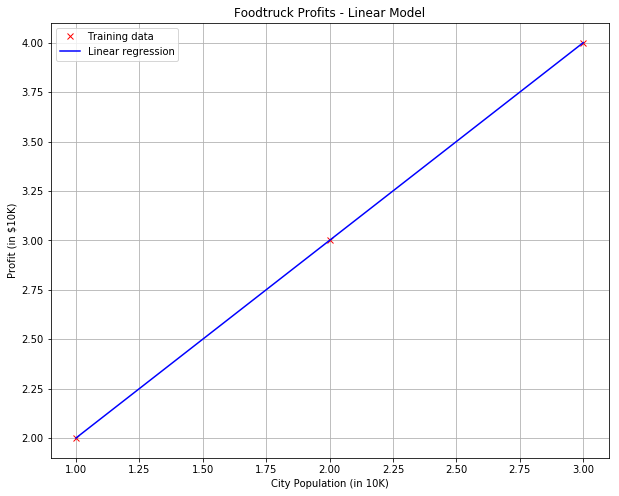

In [42]:
#visualize
plt.figure(figsize=(10,8))
plt.title('Foodtruck Profits - Linear Model')

plt.plot(X[1,:],y, 'rx', label = 'Training data')
plt.plot(X[1,:],np.dot(X.T, theta), 'b-', label = 'Linear regression')

plt.xlabel('City Population (in 10K)')
plt.ylabel ('Profit (in $10K)')
plt.grid(True)
plt.legend()
plt.show()

### Congratulations! You now understand univariate linear regression.

### Prev 2.4 Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of θ0 and θ1 values. 

Set up to calculate J(θ) over a grid of values using the computeCost function that you wrote.

In [43]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-2, 2, 100);
theta1_vals = np.linspace(-2, 2, 100);
xx, yy = np.meshgrid(theta0_vals, theta1_vals) #class numpy.ndarray size 100 x 100 = 10000

In [44]:
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals))) #class numpy.array

# Fill out J_vals
for i in np.arange(len(theta0_vals)):
    for j in np.arange(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        #print (t.shape)
        J_vals[i,j] = computeCost(X, y, t) 



In [45]:
'''# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals))) #class numpy.array

# Fill out J_vals
for i in np.arange(len(theta0_vals)):
    for j in np.arange(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        #print (t.shape)
        J_vals[i,j] = computeCost(X, y, t) 
'''

"# initialize J_vals to a matrix of 0's\nJ_vals = np.zeros((len(theta0_vals), len(theta1_vals))) #class numpy.array\n\n# Fill out J_vals\nfor i in np.arange(len(theta0_vals)):\n    for j in np.arange(len(theta1_vals)):\n        t = np.array([theta0_vals[i], theta1_vals[j]])\n        #print (t.shape)\n        J_vals[i,j] = computeCost(X, y, t) \n"

#### You will have a 2-D array of J(θ) values.
Matrix dims 100 x 100  
Use these values to produce surface and contour plots.

In [46]:
theta0_vals.shape #(100,)
theta1_vals.shape
J_vals.shape #(100, 100)

(100, 100)

In [47]:
#analyze results before plotting
print ("Min J: ", np.amin(J_vals))
min_J = np.amin(J_vals)
idx_min_J = np.argwhere(J_vals == np.amin(J_vals))
print ("Where Min J: ", idx_min_J[0])
print ("Theta0: {} Theta1: {}".format(theta0_vals[idx_min_J[0][0]], theta1_vals[idx_min_J[0][1]]))


Min J:  8.50253375505964e-05
Where Min J:  [75 74]
Theta0: 1.0303030303030307 Theta1: 0.9898989898989901


In [48]:
print("J_vals shape: ", J_vals.shape)
#preview some J vals
J_vals[30:34,30:50]

J_vals shape:  (100, 100)


array([[15.44980104, 14.97202666, 14.50187056, 14.03933272, 13.58441316,
        13.13711186, 12.69742883, 12.26536408, 11.84091759, 11.42408938,
        11.01487943, 10.61328776, 10.21931436,  9.83295922,  9.45422236,
         9.08310376,  8.71960344,  8.36372139,  8.01545761,  7.67481209],
       [15.2339047 , 14.7593953 , 14.29250417, 13.8332313 , 13.38157671,
        12.93754039, 12.50112233, 12.07232255, 11.65114104, 11.2375778 ,
        10.83163283, 10.43330613, 10.04259769,  9.65950753,  9.28403564,
         8.91618202,  8.55594667,  8.20332959,  7.85833078,  7.52095024],
       [15.01964085, 14.54839642, 14.08477026, 13.62876237, 13.18037275,
        12.7396014 , 12.30644832, 11.88091351, 11.46299697, 11.0526987 ,
        10.65001871, 10.25495698,  9.86751352,  9.48768833,  9.11548141,
         8.75089277,  8.39392239,  8.04457028,  7.70283645,  7.36872088],
       [14.80700949, 14.33903003, 13.87866884, 13.42592593, 12.98080128,
        12.5432949 , 12.1134068 , 11.69113696, 1


#### Surface and Contour Plots
The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. 

The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

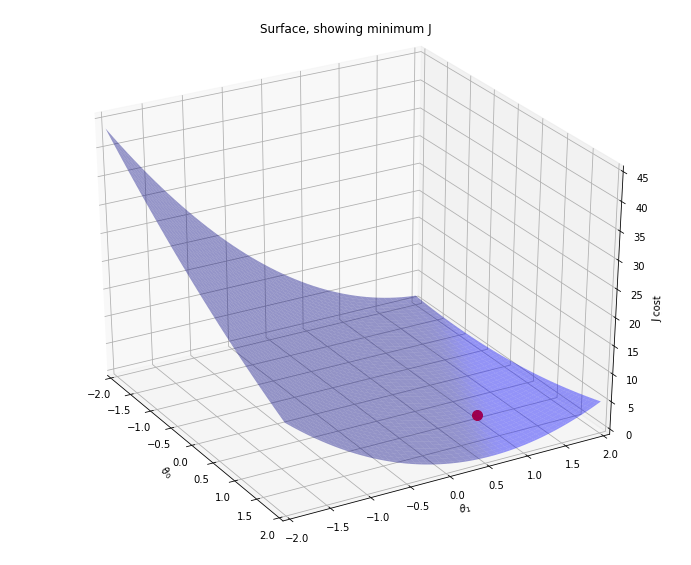

In [49]:
# plot 3D surface
plt.figure(figsize=(12,10))

#set axes
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('J cost')
ax.set_xlim(-2,2); ax.set_ylim(-2,2); ax.set_zlim(0, 45);

#plot 3D Surface
ax.plot_surface(xx, yy, J_vals.T, color='b', alpha = 0.4) 
ax.view_init(30,-30)
plt.title('Surface, showing minimum J\n')


# 3D optimal cost function J
ax.scatter3D(theta0_vals[idx_min_J[0][0]], theta1_vals[idx_min_J[0][1]], min_J, c='r', marker = 'o', s=[100]);


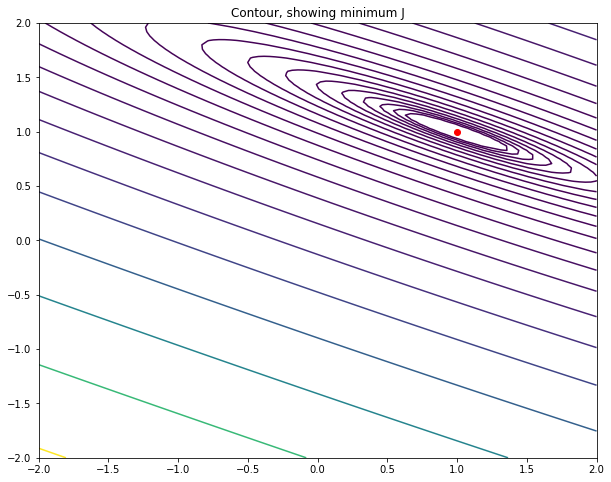

In [50]:
# plot contour plot
plt.figure(figsize=(10,8))
lvls = np.logspace(-2,3,30)
plt.contour(xx, yy, J_vals.T, levels=lvls ) 
plt.plot(theta[0], theta[1], c='r', marker = 'o')
plt.title('Contour, showing minimum J')
plt.show()

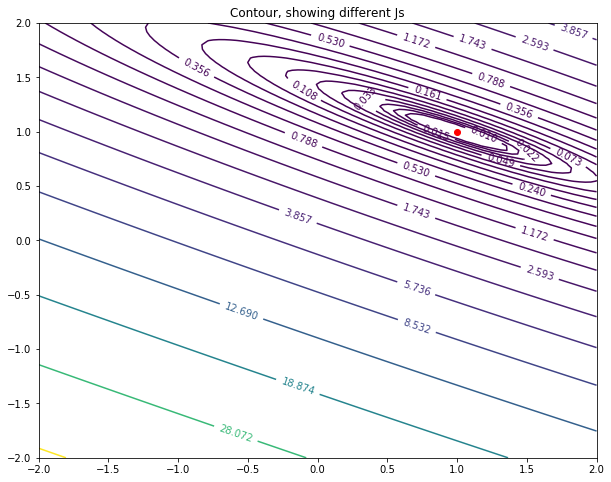

In [51]:
# plot contour plot, with J details
#src https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
fig, ax = plt.subplots(figsize=(10,8))
CS = ax.contour(xx, yy, J_vals.T, levels=lvls)
plt.plot(theta[0], theta[1], c='r', marker="o")
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour, showing different Js')
plt.show()